# Trabalho Final
------
Para instalar o kera-vis no windows seguir este passo:
https://github.com/raghakot/keras-vis/issues/146


pip install git+https://github.com/raghakot/keras-vis.git -U

## Imports

In [1]:
import os
import numpy as np
from random import sample, seed
seed(42)
np.random.seed(42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15) # Make the figures a bit bigger

# Keras imports
from keras.layers import Input, Convolution2D, MaxPooling2D, Activation, concatenate, Dropout, GlobalAveragePooling2D, Dense, Flatten
from keras.models import Model
from keras.utils import np_utils
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions

import inf619utils

Using TensorFlow backend.


# Dataset
O dataset é composto por 10 classes (dígitos de 0 a 9) com aproximadamente 205 imagens por classe. 
O conjunto foi dividido em 60% para treinamento, 15% para validação e 20% para teste.
As imagens estão divididas em blocos por classe.

** IMPORTANTE NÃO ALTERAR O NOME/LOCAL DAS IMAGENS** 

In [2]:
keras_model_file = 'keras_resnet.h5'

datasetDir = "./Dataset"
datasetDirSplitted = "./DatasetSplitted"
nbClasses = 10
input_shape = (224,224,3)
input_size = (224,224)

#Definir tamanho do batch e número de épocas
batch_size = 12 #check RAM or GPU memory size
epochs = 30

train_files = {}
val_files = {}
test_files = {}

train_files, val_files, test_files = inf619utils.splitData(datasetDir, nbClasses)

In [3]:
#plot the images from imgList
def plotImagesFromBatch(imgList):
    for i in range(len(imgList)):
        plotImage(imgList[i])


# Se quiser visualizar algum bloco de imagens, descomentar as linhas abaixo
# inf619utils.plotImages(val_files)
# inf619utils.plotImages(train_files)
# inf619utils.plotImages(test_files)

# Aplicação do Modelo no Conjunto de Testes

In [4]:
# Load Best weights saved
from keras.models import load_model

model = load_model(keras_model_file)

In [ ]:
model.summary()

c:\users\rafae\anaconda3\envs\tensorflow\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


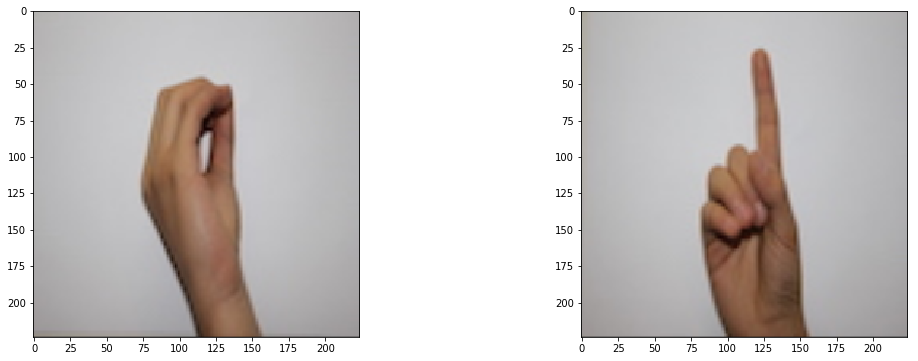

In [5]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img(datasetDirSplitted + '/test/0/IMG_1138.JPG', target_size=(224, 224))
img2 = utils.load_img(datasetDirSplitted + '/test/1/IMG_1139.JPG', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [34]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

In [6]:
# Hide warnings on Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')

from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

In [7]:
layer_idx = utils.find_layer_idx(model, 'flatten_1')

# Swap softmax with linear
#model.layers[layer_idx].activation = activations.linear
#model = utils.apply_modifications(model)

<Figure size 1296x432 with 0 Axes>

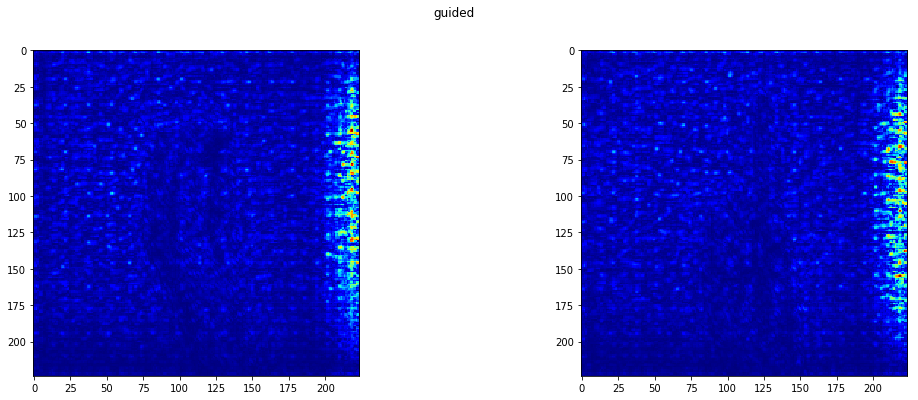

<Figure size 1296x432 with 0 Axes>

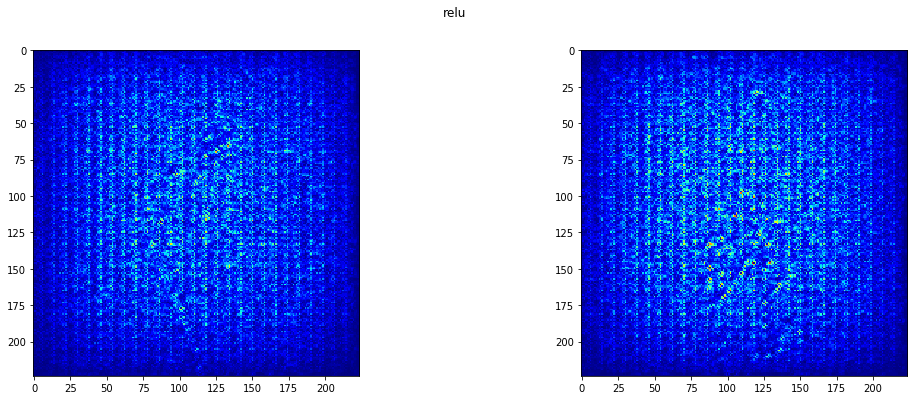

In [8]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=None,
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')

<Figure size 1296x432 with 0 Axes>

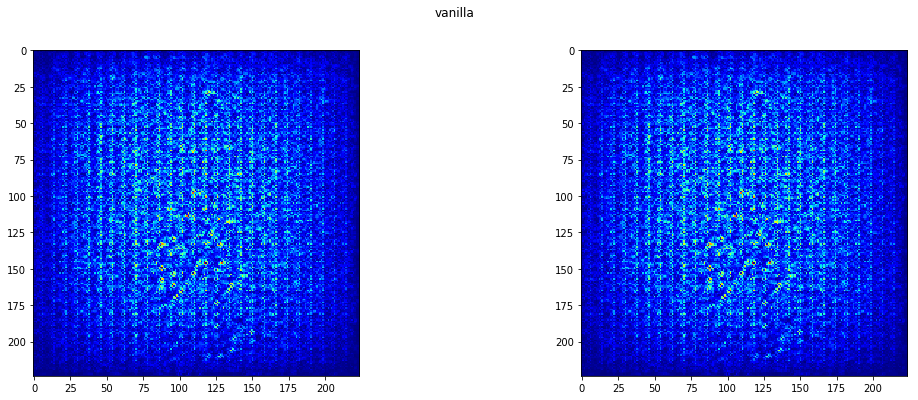

<Figure size 1296x432 with 0 Axes>

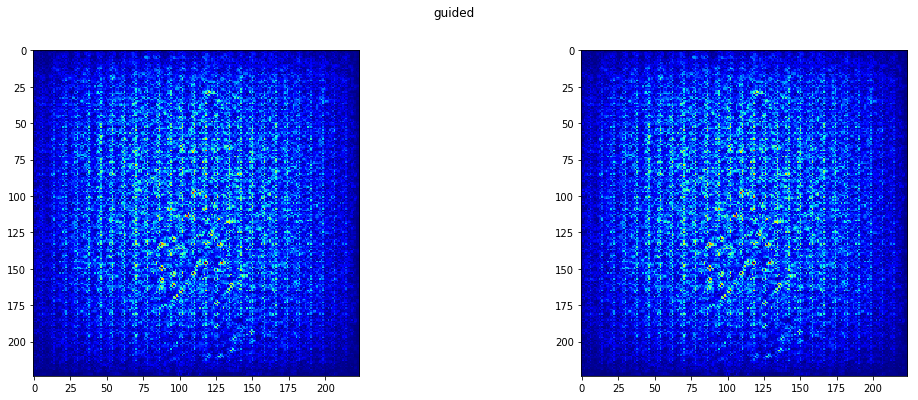

<Figure size 1296x432 with 0 Axes>

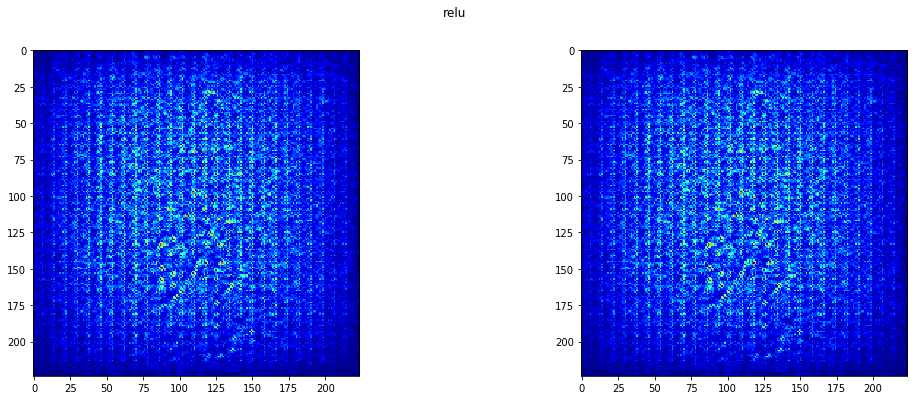

<Figure size 1296x432 with 0 Axes>

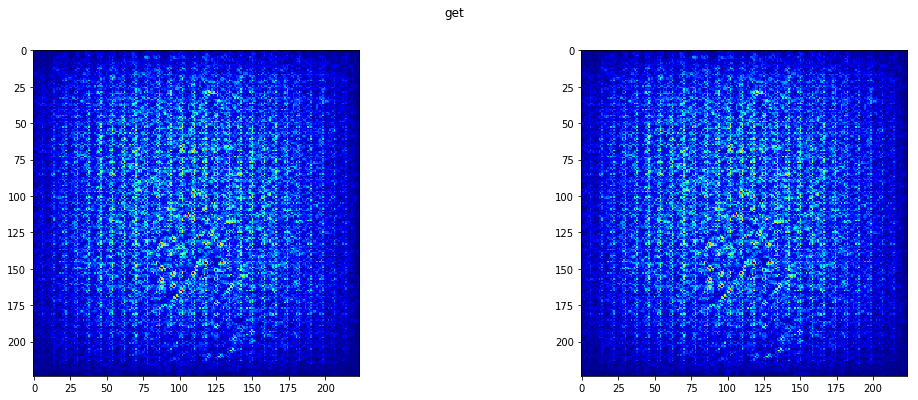

In [28]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

penultimate_layer = utils.find_layer_idx(model, 'activation_49')

for modifier in [None, 'guided', 'relu', 'get']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        jet_heatmap = visualize_cam(model, layer_idx, filter_indices=None, 
                              seed_input=img, penultimate_layer_idx=penultimate_layer,
                              backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(jet_heatmap)

In [ ]:
from vis.visualization import visualize_cam
import matplotlib.pyplot as plt
import numpy as np

#for i in range(10):
#ind = np.where(y_test == i)[0][0]
plt.subplot(141)
plt.imshow(img1)
for j,modifier in enumerate([None, 'guided', 'relu']):
    heat_map = visualize_cam(model, 166, 1, img1, backprop_modifier=modifier)
    plt.subplot(1,4,j+2)
    plt.imshow(heat_map)

plt.show()